<a href="https://colab.research.google.com/github/ehardi19/simannpy/blob/master/simulated-annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated Annealing

_Eko Hardiyanto_

1301174099

IFIK-40-01

## Problem Description

Perfrom analysis, design, and implementation of the **_Simulated Annealing_** (SA) algorithm into a computer program to find the **minimum value** of the function:

$$ f(x_1, x_2) = -\biggl( \sin{(x_1)} \cos{(x_2)} + {\frac{4}{5}} \exp {\biggl(1-\sqrt{x_1^2 + x_2^2}\biggr)} \biggr) $$

with the limits $-10 \leq x_1 \leq 10 $ and $-10 \leq x_2 \leq 10$

In [0]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## 1. Making the Objective Function

In [0]:
def f(x1, x2):
    # Return the cost of the objective function
    return -(
        math.sin(x1) * math.cos(x2) + (4/5) * 
        math.exp(1 - math.sqrt(x1**2 + x2**2))
    )

## 2. Visualizing the Formula

In this work, I'm visualizing the formula to help to define the searching range. I'm using contour using 2 parameters ($x_1$ and $x_2$) to describe the result of objective function $f(x_1, x_2)$ and coloring it with heatmap. Darker the color, the smaller the value of the objective function.

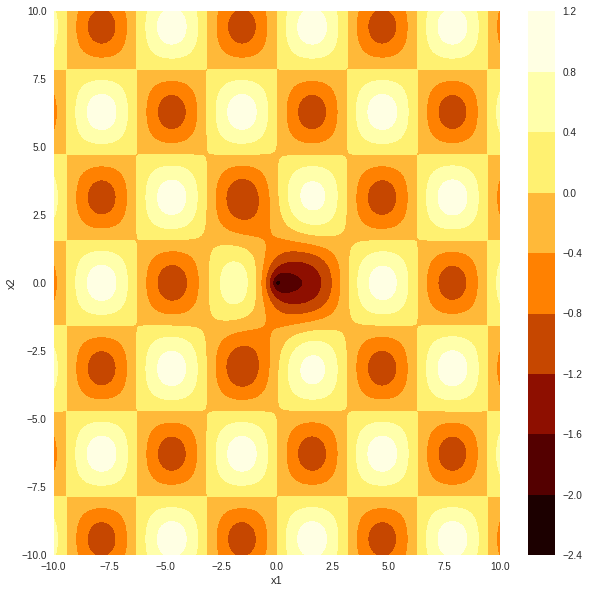

In [3]:
i1 = np.arange(-10, 10, 0.01)
i2 = np.arange(-10, 10, 0.01)

x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)

for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = f(x1m[i][j], x2m[i][j])

plt.figure(figsize=(10, 10))
plt.contourf(x1m, x2m, fm, cmap='afmhot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.show()

## 4. Defining the Generation Function

Used to generate a new random state every time it's called.

In [0]:
def generate():
    # Initiating random floating number
    return random.uniform(-10, 10)

## 5. Defining Acceptance Probability Function

Used to calculate the probability for accepting new state.

In [0]:
def acceptance_probability(delta_E, T):
    # Calculate the acceptence probability for accepting new x1 & x2
    return math.exp(-(delta_E) / T)

## The Main Function

Used to find the minimum value of the given formula.

In [0]:
def simulated_annealing(x1, x2, T): 
    """
    Main function of the simulated annealing algorithm
    that returning the best solution of given formula
    """
    
    # Making an array to store the result history
    x1_history = []
    x2_history = []
    E_history = []
    
    # Initiating current best solution
    x1_best = x1
    x2_best = x2
    E = E_best = f(x1, x2)
    
    # Loop until temperature decreased until 0.1 * 10^-256
    while T > 0.1e-256:
        # Loop for 1000 times for every new temperature
        for _ in range(1000) :
            # Generate new solution
            x1_new = generate()
            x2_new = generate()

            # Calculate new cost
            E_new = f(x1_new, x2_new)
            delta_E = E_new - E

            # If the new solution is better than current solution
            if (delta_E <= 0):
                x1 = x1_new
                x2 = x2_new

                E = E_new

                # Check wether the new solution is the current best solution
                if (E_new < E_best):
                    x1_best = x1
                    x2_best = x2
                    E_best = E

            # if the new solution is worse than the current solution
            else:
                P = acceptance_probability(delta_E, T)
                R = random.uniform(0, 1)
                
                # Checking the acceptance probability of the current solution is good to try
                if (R < P):
                    x1 = x1_new
                    x2 = x2_new
                    
                    E = E_new
        
        # Add the current best solution to history array for every cooling schedule
        x1_history.append(x1_best)
        x2_history.append(x2_best)
        E_history.append(E_best)

        # Cooling Schedule
        # Decrase the temperature with alpha = 0.99
        T *= 0.99
    
    # Print the result
    print("Best Solution: ", x1, ", ", x2)
    print("Best Objective: ", E_best)
    
    # Return the history of the solution
    return x1_history, x2_history, E_history

## Running the Program

Initiating the starting value and run it in Simulated Annealing

In [7]:
# Initiating the start temperature
T = 10000

# Initiating the value of current value
# Generate state from random value (-10, 10)
x1 = generate()
x2 = generate()

# Store the result history
x, y, z = simulated_annealing(x1, x2, T)

Best Solution:  0.0010755071230938995 ,  0.0010931894860455316
Best Objective:  -2.1723686256900545


By using the Simulated Annealing above, we got solution. It is $(0.0010755071230938995 ,  0.0010931894860455316)$ in the form of $(x_1, x_2)$. The value of $f(x_1, x_2)$ is $-2.1723686256900545$. Please notice that the solution could be a bit different if we start over and run the algorithm again, the result would be around $-2$.

## Plotting the Movement of the Result History

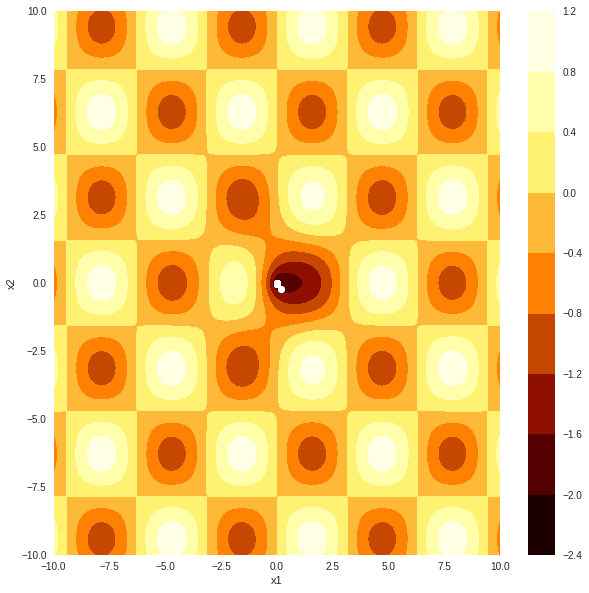

In [8]:
i1 = np.arange(-10, 10, 0.01)
i2 = np.arange(-10, 10, 0.01)

x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)

for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = f(x1m[i][j], x2m[i][j])

plt.figure(figsize=(10, 10))
plt.contourf(x1m, x2m, fm, cmap='afmhot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x, y, 'y-o', color='white')
plt.colorbar()

plt.show()

We all know the solution is around $-2$ and its produced around $(0, 0)$. Hence, by looking the contour plot above, the solution is on that dark red color (black) and the movement described by white line.

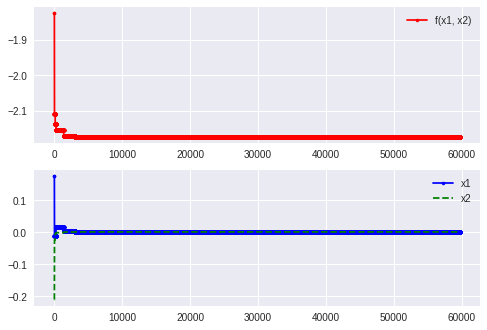

In [9]:
fig = plt.figure()
obj = fig.add_subplot(211)
obj.plot(z,'r.-')
obj.legend(['f(x1, x2)'])

sol = fig.add_subplot(212)
sol.plot(x,'b.-')
sol.plot(y,'g--')
sol.legend(['x1','x2'])

plt.show()

The graphics above describing the movement of the $f(x_1, x_2)$ on the first and the movement of $(x_1, x_2)$ on the second by running the Simulated Annealing.